In [2]:
# from google.cloud import bigquery

# GCP_PROJECT = "cedar-heaven-387214"
# BQ_DATASET = "PLACEHOLDER"

# client = bigquery.Client()

# # Create the BigQuery dataset
# dataset_id = f"{GCP_PROJECT}.{BQ_DATASET}"
# dataset = bigquery.Dataset(dataset_id)
# dataset.location = "US"
# try:
#     dataset = client.create_dataset(dataset, timeout=30)  # Make an API request.
#     print("Created dataset {}.{}".format(client.project, dataset.dataset_id))
# except exceptions.Conflict:
#     print("Dataset already exists - choose a new name if the dataset is not under your control")
#     pass

Created dataset cedar-heaven-387214.PLACEHOLDER


In [3]:
# from google.cloud import storage

# GCP_REGION = "northamerica-northeast2"
# GCP_BUCKET = "amazon_shoes_review"

# storage_client = storage.Client()

# try:
#     bucket = storage_client.bucket(GCP_BUCKET)
#     bucket.storage_class = "STANDARD"
#     new_bucket = storage_client.create_bucket(bucket, location=GCP_REGION)
# except exceptions.Conflict:
#     print("Bucket already exists - choose a new name if the bucket is not under your control")
#     pass

In [2]:
# from google.cloud import aiplatform

# GCP_PROJECT = "cedar-heaven-387214"
# GCP_REGION = "northamerica-northeast2"
# EXPERIMENT_NAME = "example"

# # Vertex AI initialization
# aiplatform.init(
#     project=GCP_PROJECT,
#     location=GCP_REGION,
#     experiment=EXPERIMENT_NAME,
# )

In [6]:
%%time
# Loading the data
import pandas as pd

# Grabbing the bucket where the shoes are if this is first load
# bucket_name = 'amazon_shoes_review'
# file_path = 'gs://amazon_shoes_review/Shoes.tsv'

file_path = 'Shoes.tsv'
print(file_path)
df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')

Shoes.tsv
CPU times: user 28.6 s, sys: 2.75 s, total: 31.4 s
Wall time: 31.4 s


In [11]:
df.to_csv('Shoes.csv', index=False, sep=';')

In [12]:
file_path = 'Shoes.csv'
print(file_path)
df = pd.read_csv(file_path, sep='\t')

Shoes.csv


ParserError: Error tokenizing data. C error: Expected 1 fields in line 89253, saw 3


In [5]:
# Load the pickled object
with open('shoes.pkl', 'rb') as f:
    df = pickle.load(f)

# Print the loaded object
print(df)

        marketplace  customer_id       review_id  product_id  product_parent  \
0                US     18069663  R3P2HIOQCIN5ZU  B000XB31C0       265024781   
1                US     16251825  R12VVR0WH5Q24V  B00CFYZH5W       259035853   
2                US     20381037   RNCCKB6TV5EEF  B00S8JNN3Q       666066660   
3                US       108364  R2NZXYIVCGB13W  B00XFBPOQG       448483263   
4                US     45449350  R2EQ1TG9IT3OEQ  B00SW64Y9W         7853171   
...             ...          ...             ...         ...             ...   
4209947          US     38071127  R2GD8KU7KSAZFF  B0026M2EJA       162892036   
4209948          US     30774624   RZQDQCBDVZZIB  B0010B39UG       774408163   
4209949          US     18301277  R2R4NLGHL5PQP4  B002GJMOV6       486585122   
4209950          US     13248537   RQUWXQ3RMZYQ7  B0011EEVXQ       193349053   
4209951          US     36905767   RX7ODA844ZLW1  B0012QSWJC       879693833   

                                       

In [4]:
import pickle

with open('shoes.pkl', 'wb') as f:
    pickle.dump(df, f)

In [ ]:
# %%time
# from google.cloud import storage

# # Create a client instance
# storage_client = storage.Client()

# # Specify your bucket and CSV file name
# bucket = 'amazon_shoes_review'
# csv = 'Shoes.tsv'

# # Get the bucket and file objects
# bucket = storage_client.get_bucket(bucket)
# blob = bucket.blob(csv)

# # Download the CSV file to a local temporary file
# local_file_path = 'Shoes.tsv'
# blob.download_to_filename(local_file_path)

# # Read the CSV file using pandas or any other library of your choice
# import pandas as pd

# df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')

In [ ]:
print(df.head())

In [4]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,18069663,R3P2HIOQCIN5ZU,B000XB31C0,265024781,Minnetonka Men's Double Deerskin Softsole Mocc...,Shoes,1,0,0,N,Y,.,Do not buy: really didn't start to wear them u...,2015-08-31
1,US,16251825,R12VVR0WH5Q24V,B00CFYZH5W,259035853,Teva Men's Pajaro Flip-Flop,Shoes,5,0,0,N,Y,super flip flop,provides great cushion as well as archsupport,2015-08-31
2,US,20381037,RNCCKB6TV5EEF,B00S8JNN3Q,666066660,Anne Klein Perfect Pair Wristlet,Shoes,4,0,0,N,Y,Great clutch purse!,It's perfect if you need something small for c...,2015-08-31
3,US,108364,R2NZXYIVCGB13W,B00XFBPOQG,448483263,adidas Men's 10K Lifestyle Runner Sneaker,Shoes,5,0,6,N,Y,Badass,Getting what u see,2015-08-31
4,US,45449350,R2EQ1TG9IT3OEQ,B00SW64Y9W,7853171,OverBling Sneakers for Men Casual Men Shoes Ge...,Shoes,3,0,0,N,Y,Three Stars,small,2015-08-31


In [5]:
import os
import pandas as pd
# pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

In [6]:
embedder = SentenceTransformer('bert-base-cased')

No sentence-transformers model found with name /home/jupyter/.cache/torch/sentence_transformers/bert-base-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /home/jupyter/.cache/torch/sentence_transformers/bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model fr

In [7]:
product_names = df['product_title']
product_names

0          Minnetonka Men's Double Deerskin Softsole Mocc...
1                                Teva Men's Pajaro Flip-Flop
2                           Anne Klein Perfect Pair Wristlet
3                  adidas Men's 10K Lifestyle Runner Sneaker
4          OverBling Sneakers for Men Casual Men Shoes Ge...
                                 ...                        
4358815                   Fox Men's Featherlite Shoe Lace-Up
4358816                                        Floor Spinner
4358817                                        Floor Spinner
4358818                                        Floor Spinner
4358819                                        Floor Spinner
Name: product_title, Length: 4358820, dtype: object

In [8]:
corpus = list(product_names)
corpus = corpus[0:50000]
corpus

["Minnetonka Men's Double Deerskin Softsole Moccasin",
 "Teva Men's Pajaro Flip-Flop",
 'Anne Klein Perfect Pair Wristlet',
 "adidas Men's 10K Lifestyle Runner Sneaker",
 'OverBling Sneakers for Men Casual Men Shoes Genuine Leather Shoes Slip On Boat Loafers',
 'MESSI 15.3 FG/AG SOCCER SHOES (8.5)',
 "Hoka One One Men's Stinson Lite Shoe",
 "Olukai Nohea Mesh Shoe - Men's",
 'Carolina Mens 6" Waterproof Broad Composite Toe Work Boot',
 "Alegria Women's Seville Clog",
 "Naturalizer Women's Happening Dress Sandal",
 'Forever Link Womens Vera-82 Sandals',
 'Versace Collection Black Perforated Leather Loafers Shoes',
 "Twisted Girl's Champion Casual Boat Shoe",
 'Travel Smart Hand Pouch Bag In Bag Organiser Cosmetic Gadget Purse Organizers Inserts',
 "Saucony Originals Men's Jazz Low Pro Vegan Sneaker",
 "Dr. Marten's Women's 1460 Black Patent Lamper Boots",
 "Skechers Performance Women's Go Walk Extend Slip-On Walking Shoe",
 "Hi-Tec Kid's Nepal Waterproof Junior Hiking Boot (Toddler/Litt

In [9]:
%%time
corpus_embeddings = embedder.encode(corpus)

KeyboardInterrupt: 

In [10]:
from sklearn.cluster import KMeans

In [11]:
%%time
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

NameError: name 'corpus_embeddings' is not defined

In [12]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster'] = cluster_assignment
cluster_df

NameError: name 'cluster_assignment' is not defined

In [ ]:
common_shoes = ['running shoe', 'walking shoe', 'flip', 'sandal', 'sneaker'] #flip for flip flop

In [ ]:
label_shoes = df['product_title'].str.contains('|'.join(common_shoes), case=False, na=False)
df_shoes=df[label_shoes]

In [ ]:
test = ['flip flop']
label_test = df['product_title'].str.contains('|'.join(test), case=False, na=False)
df_test=df[label_test]

In [ ]:
df_test

In [ ]:
common_others = [' bag ', 'sunglasses', 'wallet', 'ray ban', 'rayban', 'tote', 'handbag', 'purse', 'clutch'] 

In [ ]:
label_others = df['product_title'].str.contains('|'.join(common_others), case=False, na=False)
df[label_others]

In [ ]:
df_shoes[label_others]

In [ ]:
# creating a dataframe with just product names
df_names = df['product_title']
df_others = pd.DataFrame(df_names[label_others]) #pd.Dataframe is needed to add the column label after
df_shoes = pd.DataFrame(df_names[label_shoes])
df_others['label'] = 'others'
df_shoes['label'] = 'shoes'

In [ ]:
# combining and removing products that have shoes and others tag
combined_df = pd.concat([df_others, df_shoes])
filtered_df = combined_df[~(label_others & label_shoes)]

In [ ]:
common_shoes = ['running shoe', 'walking shoe', 'flip', 'sandal', 'sneaker', 'boot', 'crocs', 'skateboarding shoe', 'clog', 'hiking shoe', 'slipper', 'flat', 'pump', 'shoe'] #flip for flip flop

In [ ]:
label_shoes = df['product_title'].str.contains('|'.join(common_shoes), case=False, na=False)
df_shoes=df[label_shoes]

In [ ]:
# Create a boolean mask indicating rows in df1 that are not present in df2
mask = ~df.isin(df_shoes)

# Filter df1 using the mask to get rows not in df2
result = df[mask]

In [ ]:
# Print the result

list(result.dropna()['product_title'].unique())

In [ ]:
df_shoes['product_title']

In [105]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])
    
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
["Minnetonka Men's Double Deerskin Softsole Moccasin", "Teva Men's Pajaro Flip-Flop", "adidas Men's 10K Lifestyle Runner Sneaker", "Hoka One One Men's Stinson Lite Shoe", "Olukai Nohea Mesh Shoe - Men's", "Alegria Women's Seville Clog", "Naturalizer Women's Happening Dress Sandal", 'Forever Link Womens Vera-82 Sandals', "Twisted Girl's Champion Casual Boat Shoe", "Dr. Marten's Women's 1460 Black Patent Lamper Boots", "Skechers Performance Women's Go Walk Extend Slip-On Walking Shoe", "RYKA Women's Vida RZX Cross-Training Shoe", "Teva Women's Kayenta Sandal", "adidas outdoor Men's Ax 2 Hiking Shoe", "Nine West Women's Blustery Suede Ballet Flat", "DC Men's Court Graffik SE Skateboarding Shoe", "Skechers Sport Men's Equalizer Persistent Slip-On Sneaker", "Sanuk Women's On The Prowl Flat Shoe", "Under Armour Women's Valsetz Boots 10 Black", "ASICS Men's GEL-Contend 3 Running Shoe", "Luxehome Women's Cozy Fleece House Slippers", "New Balance Women's W850v1 Running Shoe", "Columb

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [54]:
def word_cloud(pred_df, label):
    wc = ' '.join([text for text in pred_df['corpus'][pred_df['cluster'] == label]])
    wordcloud = WordCloud(width = 800, height = 500, random_state = 20, max_font_size = 110).generate(wc)
    fig7 = plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

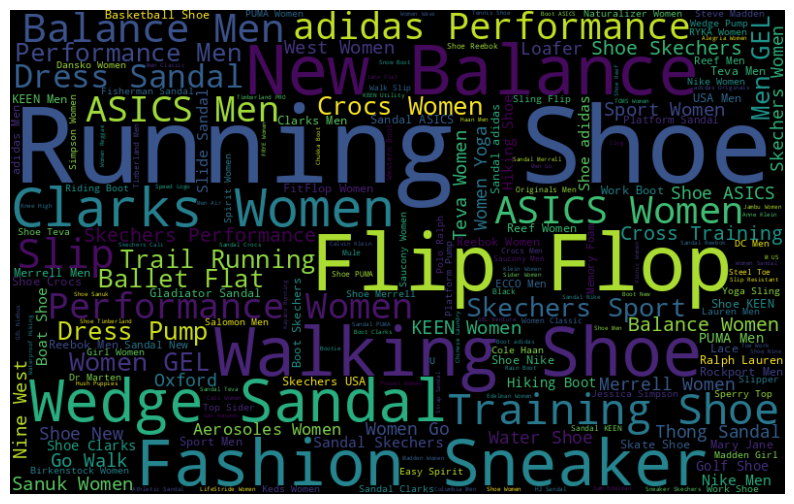

In [60]:
word_cloud(cluster_df, 0)

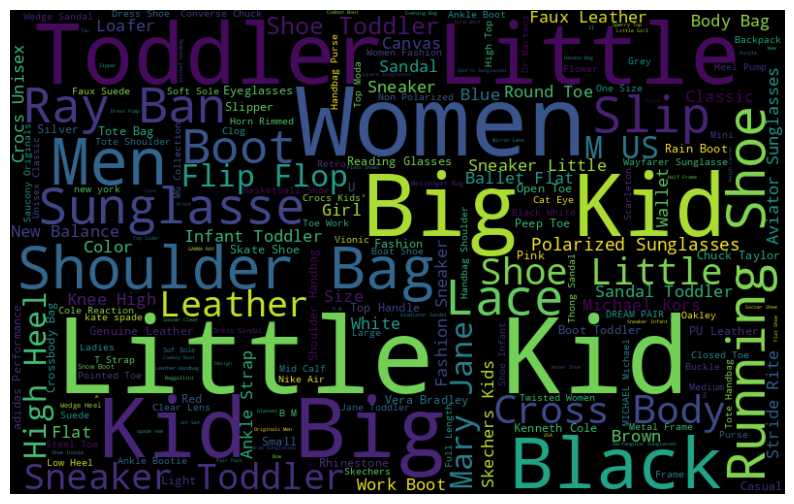

In [61]:
word_cloud(cluster_df, 1)

In [ ]:
labeled_embeddings = embedder.encode(filtered_df)

In [ ]:
%%time
corpus_embeddings = embedder.encode(corpus)

In [ ]:
%%time
num_clusters = 2
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_